In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
import keras
from keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.models import Sequential
import librosa
import librosa.display
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset_path = 'Speaker_0025_00043.wav'

In [ ]:
audio_data = []
labels = []

In [ ]:
for filename in dataset_path:
    if filename.endswith('.wav'):  # Assuming your audio files are in WAV format
        # Load audio file
        file_path = os.path.join(dataset_path, filename)
        audio, sr = librosa.load(file_path)

        # Extract features (e.g., MFCCs)
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
        mfccs = np.mean(mfccs.T, axis=0)  # Average MFCCs over time

        # Append features and label to lists
        audio_data.append(mfccs)
        labels.append(filename.split('_')[0])  # Assuming label is the first part of the filename

In [ ]:
audio_data = np.array(audio_data)
labels = np.array(labels)

In [ ]:
print("Audio Data Shape:", audio_data.shape)
print("Labels Shape:", labels.shape)

Audio Data Shape: (0,)
Labels Shape: (0,)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=pd.DataFrame(audio_data)
df

,0


In [ ]:
import IPython.display as ipd
ipd.Audio(os.listdir()[1])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
y,sr=librosa.load(os.listdir()[1],sr=22050)
ps=librosa.feature.melspectrogram(y=y,sr=sr)
ps.shape

(128, 2584)

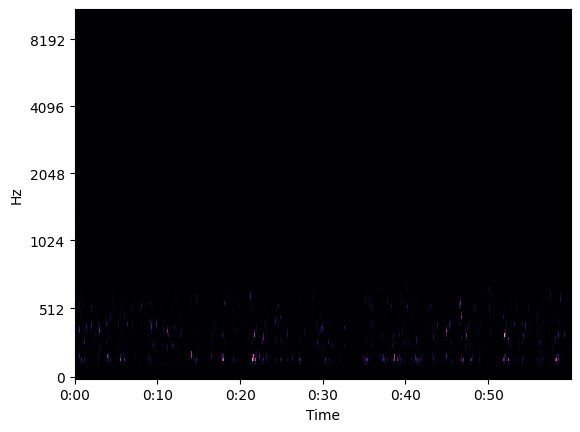

In [ ]:
librosa.display.specshow(ps,x_axis='time',y_axis='mel')


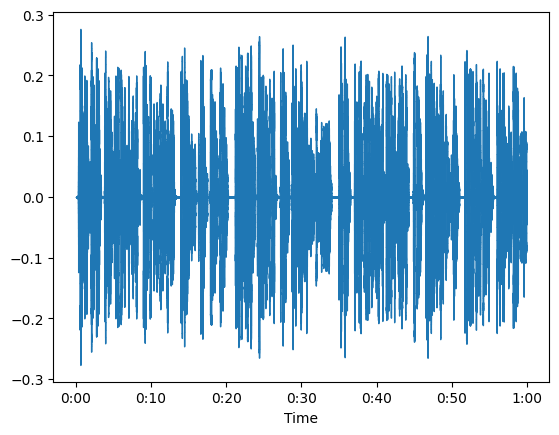

In [ ]:
librosa.display.waveshow(y,sr=sr)

In [ ]:
y=df.iloc[:,-1]
x=df.iloc[:,:-1]

In [ ]:
import pandas as pd
print(df.shape)  # Check the shape of the DataFrame
print(df.head())  # Display the first few rows of the DataFrame

(0, 1)
Empty DataFrame
Columns: [0]
Index: []
